In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import random

In [41]:
# imports to visualize and extract tree information
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from StringIO import StringIO

In [2]:
X_train=pd.read_csv("X_train.csv",sep=';',index_col="Id")
y_train=pd.read_csv("y_train.csv",sep=';',index_col="Id")
train=pd.read_csv("X_train.csv",sep=';',index_col="Id")
train["SalePrice"]=y_train["SalePrice"]
#for model validation, split the whole training set in training and validation datasets
from sklearn.model_selection import train_test_split
X_train_split1, X_test, y_train_split1, y_test = train_test_split(X_train,y_train, test_size=0.15,random_state=42)

## 2D Graph with splitted feature space splitted for theoretical foundation section

In [35]:
# for graphics with only variable GrLivArea
labels=list(X_train.columns.values)
labels.remove('GrLivArea')
for i in labels:
    X_train.drop(i,axis=1,inplace=True)

In [36]:
dtree=DecisionTreeRegressor(random_state=42,max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [57]:
## to return the splitting points:
splitting_points=dtree.tree_.threshold # use sorted(dtree.tree_.threshold) to create list of splits in ascending order
# clear "-2" values assigned to mark leaf nodes
splitting_points=filter(lambda a: a != -2.0, splitting_points)
print(splitting_points)

[1488.0, 1198.5, 803.5, 1413.0, 2361.0, 1825.0, 3550.5]


In [ ]:
# to create graphics with fewer splits, just delete the lines here

def create_hue(value):
    if value<803.5:
        return "<= 803.5"
    elif value<1198.5:
        return "<= 1198.5"
    elif value<1413.0:
        return "<= 1413.0"
    elif value<1488.0:
        return "<= 1488.0"
    elif value<1825.0:
        return "<= 1825.0"
    elif value<2361:
        return "<= 2361"
    elif value<3550.5:
        return "<= 3550.5"
    else:
        return "> 3550.5"

In [9]:
train["hue_split"]=train["GrLivArea"].apply(create_hue)

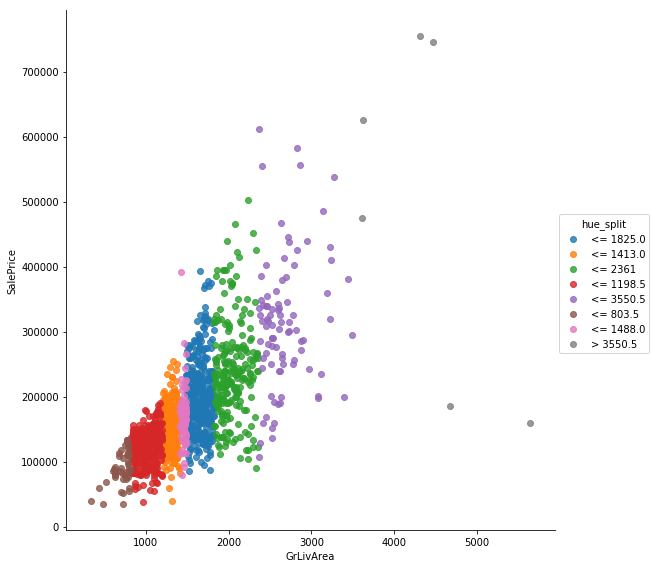

In [11]:
#generate a graph with splitted features space according to the splits in the regression tree
sns.lmplot(x="GrLivArea", y="SalePrice",hue="hue_split",fit_reg=False,data=train,
               truncate=False, size=8,)
#plt.savefig("splitted_GrLivArea.png")

## Graphics of Regression Trees (section Instability)

In [ ]:
labels=list(X_train.columns.values)
labels.remove('GrLivArea')

In [ ]:
for i in labels:
    X_train.drop(i,axis=1,inplace=True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from StringIO import StringIO

In [18]:
#present random states for splitting, number of random states determines how many graphics are generated
states=[0,101,42]
#max_depth=None for graphic of "overfitting tree"
dtree=DecisionTreeRegressor(random_state=42,max_depth=3) 
for i in range(len(states)):
    X_train_split, X_eval, y_train_split, y_eval = train_test_split(X_train,y_train, test_size=0.2,random_state=states[i])
    dtree.fit(X_train_split, y_train_split)
    labels=list(X_train_split.columns.values)
    dot_data = StringIO()
    export_graphviz(dtree, out_file=dot_data,  
                    filled=True, rounded=True,feature_names=labels,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    Image(graph.create_png())
#to save the file, specify filename:
    graph.write_png("liv_houseprice"+str(i)+".png")

## Feature importances RF Graphic

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
rfr=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False,random_state=42)

In [5]:
rfr.fit(X_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Feature ranking:
1. feature:GrLivArea - importance: 0.0706247177112
2. feature:OverallQual - importance: 0.0690634584053
3. feature:YearBuilt - importance: 0.0431254264088
4. feature:GarageArea - importance: 0.0428573457947
5. feature:TotalBsmtSF - importance: 0.0407007080783
6. feature:total_age - importance: 0.0373845768073
7. feature:GarageCars - importance: 0.0369256982787
8. feature:KitchenQual - importance: 0.0367614346492
9. feature:1stFlrSF - importance: 0.0348647356376
10. feature:ExterQual - importance: 0.0345035156697
11. feature:BsmtFinSF1 - importance: 0.0317722349075
12. feature:BsmtQual - importance: 0.0310921848862
13. feature:age_garage - importance: 0.0263930146251
14. feature:LotArea - importance: 0.0259920145363
15. feature:TotRmsAbvGrd - importance: 0.0237014803184
16. feature:FullBath - importance: 0.0235624464067
17. feature:2ndFlrSF - importance: 0.0223949210743
18. feature:YearRemodAdd - importance: 0.0201855344747
19. feature:Fireplaces - importance: 0.0188879

<Figure size 432x288 with 0 Axes>

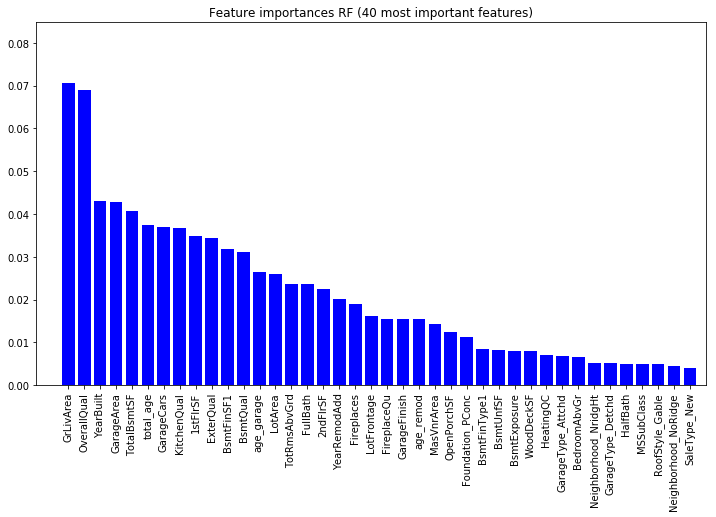

In [14]:
#number of features shown in graphic:
features=40
predictor=rfr
importances =predictor.feature_importances_
indices = np.argsort(importances)[::-1]
labels=list(X_train.columns.values)
counter=0
label_names={}
for i in labels:
    label_names[counter]=i
    counter+=1

# Print the feature ranking
print("Feature ranking:")

count=0
importances_graphic=[]
labels_graphic=[]
numbers=[]
for f in range(X_train.shape[1]):
    print(str(count+1) +". feature:"+ label_names[indices[f]]+" - importance: "+str(importances[indices[f]]))
    importances_graphic.append(importances[indices[f]])
    labels_graphic.append(label_names[indices[f]])
        
    count+=1

# Plot the feature importances of the forest
plt.figure()
plt.figure(figsize=(12,8))
plt.title("Feature importances RF ("+str(features)+" most important features)")
plt.bar(range(1,features+1), importances_graphic[:features],
       color="b", align="center")
plt.xticks(range(1,features+1),labels_graphic[:features],rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.25)
plt.xlim([-1, features+1])
#saving figure
#plt.savefig('new_rfr_feature_importance.png')

plt.show()